In [17]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
#Reading the dataset
data= pd.read_csv(r'C:\Users\Sachin Koli\Downloads\Fake-news-project\Fake news project\train_news.csv')

In [19]:
data

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

In [20]:
#checking the shape of the data
data.shape

(20800, 6)

In [21]:
#observing the first three observations of the feature 'headline'
data['headline'][0:3]

0    Ethics Questions Dogged Agriculture Nominee as...
1    U.S. Must Dig Deep to Stop Argentina’s Lionel ...
2    Cotton to House: ’Do Not Walk the Plank and Vo...
Name: headline, dtype: object

In [22]:
#Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


OBSERVATION:

>The dataset has null values in the features- headline, written_by, news.

>The dataset comprises of 3 columns each of int and  object datatypes.

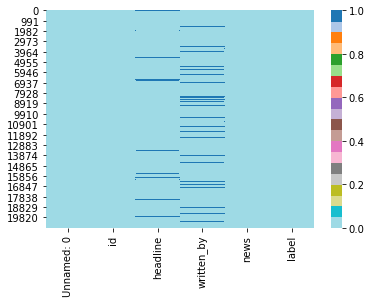

In [23]:
#Using heatmap to observe the missing values
sns.heatmap(data.isnull(),cmap='tab20_r')

In [24]:
data.isnull().sum().to_frame().rename(columns={0:'Null Value Count'})

Null Value Count
Unnamed: 0                 0
id                         0
headline                 558
written_by              1957
news                      39
label                      0

Observation:

> We have 

> 558 missing values in feature headline, 

> 1957 missing values in feature written_by and 

> 39 missing values in feature news.

In [25]:
#We will drop the missing values from our dataset. As we have text data in the dataset any other feature engineering would not work on handling missing values, dropping works when we have text data.

df=data.dropna()
df.reset_index(inplace=True)

In [26]:
print('Total observations were in the dataset before dropping missing values {} .'.format(data.shape[0]))
print('{} observations were left after dropping missing values'.format(df.shape[0]))
print('We only lost {} observations in dropping missing values.'.format(data.shape[0]-df.shape[0]))

Total observations were in the dataset before dropping missing values 20800 .
18285 observations were left after dropping missing values
We only lost 2515 observations in dropping missing values.


In [27]:
#cat_col is the list of categorical columns
#num_col is the list of numerical columns
cat_col=[i for i in df.columns if df[i].dtypes=='O']
num_col=[i for i in df.columns if i not in cat_col]
print(cat_col,'\n',num_col)

['headline', 'written_by', 'news'] 
 ['index', 'Unnamed: 0', 'id', 'label']


In [28]:
#statistical information about the categorical columns of the dataset.
df[num_col].describe()

index    Unnamed: 0            id         label
count  18285.000000  18285.000000  18285.000000  18285.000000
mean   10402.462401  10402.462401  10409.807383      0.433361
std     6007.395334   6007.395334   5998.216236      0.495553
min        0.000000      0.000000      0.000000      0.000000
25%     5206.000000   5206.000000   5217.000000      0.000000
50%    10413.000000  10413.000000  10422.000000      0.000000
75%    15596.000000  15596.000000  15603.000000      1.000000
max    20799.000000  20799.000000  20799.000000      1.000000

Observation:

> Features 'Unnamed: 0' ane 'id' are unique to each observation.

> Feature label is imbalanced as 75% of the observations are labelled as 0.

In [29]:
#statistical information about the categorical columns of the dataset.
df[cat_col].describe()

headline written_by   news
count                                               18285      18285  18285
unique                                              17931       3838  18017
top     Get Ready For Civil Unrest: Survey Finds That ...    Pam Key       
freq                                                    5        243     72

Observation:

> Count for each feature is 18285 after removing the missing values.

> We can see the number of unique observation in each of the feature

# DATA PRE-PROCESSING

In [30]:
pip install psutil

Note: you may need to restart the kernel to use updated packages.


In [31]:
from nltk.corpus import stopwords   #importing stopwords
from nltk.stem.porter import PorterStemmer  #importing porter stemmer
import re  #importing regular expression

In [34]:
def processed(text):
    clean=re.sub('[^a-zA-Z]',' ',text)  #replace everything except words with a blank space
    clean=clean.lower()                 #lower case the words
    clean=clean.split()                 #splitting the sentence into single words
    
    clean=' '.join(clean)   #joining the split words again into sentence
    return clean    #returning clean text
 

In [35]:
#applying the above defined function to pre-process the text
df['news']=df['news'].apply(processed)

In [36]:
df

index  Unnamed: 0     id  \
0          0           0   9653   
1          1           1  10041   
2          2           2  19113   
3          3           3   6868   
4          4           4   7596   
...      ...         ...    ...   
18280  20794       20794    366   
18281  20796       20796  14831   
18282  20797       20797  18142   
18283  20798       20798  12139   
18284  20799       20799  15660   

                                                headline  \
0      Ethics Questions Dogged Agriculture Nominee as...   
1      U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      Cotton to House: ’Do Not Walk the Plank and Vo...   
3      Paul LePage, Besieged Maine Governor, Sends Co...   
4                           A Digital 9/11 If Trump Wins   
...                                                  ...   
18280  One Police Shift: Patrolling an Anxious Americ...   
18281        Albert Pike and the European Migrant Crisis   
18282  Dakota Access Caught Infiltrating Protests to ...   
18283  How to Stretch the Summer Solstice - The New Y...   
18284  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
18280          The New York Times   
18281               Rixon Stewart   
18282                 Eddy Lavine   
18283              Alison S. Cohn   
18284                Tom Ciccotta   

                                                    news  label  
0      washington in sonny perdue s telling georgians...      0  
1      houston venezuela had a plan it was a tactical...      0  
2      sunday on abc s this week while discussing the...      0  
3      augusta me the beleaguered republican governor...      0  
4      finian cunningham has written extensively on i...      1  
...                                                  ...    ...  
18280  policing in america today is a rib dinner paid...      0  
18281  by rixon stewart on november rixon stewart nov...      1  
18282  posted by eddie you know the dakota access pip...      1  
18283  it s officially summer and the society boutiqu...      0  
18284  emory university in atlanta georgia has announ...      0  

[18285 rows x 7 columns]

In [37]:
#keeping just news and label in a dataframe
clean_data=df[['news','label']].copy()
clean_data

news  label
0      washington in sonny perdue s telling georgians...      0
1      houston venezuela had a plan it was a tactical...      0
2      sunday on abc s this week while discussing the...      0
3      augusta me the beleaguered republican governor...      0
4      finian cunningham has written extensively on i...      1
...                                                  ...    ...
18280  policing in america today is a rib dinner paid...      0
18281  by rixon stewart on november rixon stewart nov...      1
18282  posted by eddie you know the dakota access pip...      1
18283  it s officially summer and the society boutiqu...      0
18284  emory university in atlanta georgia has announ...      0

[18285 rows x 2 columns]

# VISUALIZATION

0    10361
1     7924
Name: label, dtype: int64

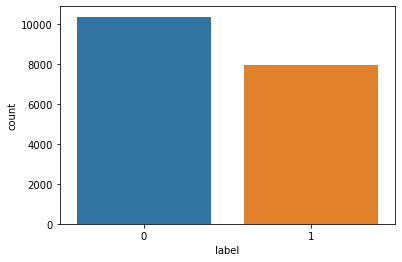

In [38]:
#checking the frequency of the labels using countplot
sns.countplot(clean_data['label'])
clean_data['label'].value_counts()

Observation:

> There are 7924 news classified as fake in the dataset and 10361 genuine news.

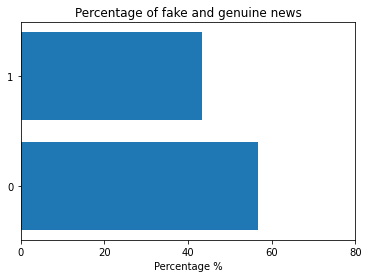

56.66393218485097 	 43.33606781514903


In [39]:
#Checking the percentage of fake news.
fake=clean_data['label'].sum()/len(clean_data)*100
genuine=100-fake
ax=np.arange(2)

plt.barh(ax,[genuine,fake])
plt.xlabel('Percentage %')
plt.xticks(np.arange(0,100,20))
plt.title('Percentage of fake and genuine news')
plt.yticks(ax)
plt.show()
print(genuine,'\t',fake)

Observation:

>The fake news are 43.33606781514903 percent of the total observations and genuine news are 56.66%.

In [40]:
#checking the length of the news
clean_data['len']=clean_data['news'].str.len()
clean_data

news  label    len
0      washington in sonny perdue s telling georgians...      0   7539
1      houston venezuela had a plan it was a tactical...      0   5830
2      sunday on abc s this week while discussing the...      0    401
3      augusta me the beleaguered republican governor...      0   6260
4      finian cunningham has written extensively on i...      1   8883
...                                                  ...    ...    ...
18280  policing in america today is a rib dinner paid...      0  18760
18281  by rixon stewart on november rixon stewart nov...      1   6409
18282  posted by eddie you know the dakota access pip...      1   3353
18283  it s officially summer and the society boutiqu...      0   2094
18284  emory university in atlanta georgia has announ...      0   1846

[18285 rows x 3 columns]

In [41]:
#storing the clean data to not lose the progress of the project
clean_data.to_csv('fake_new.csv')

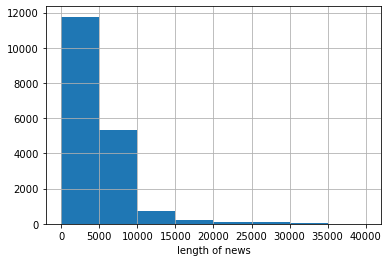

The shortest news is of length: 0
The longest news is of length: 129027


In [43]:
#Checking the length of news through histogram
bins=[0,5000,10000,15000,20000,25000,30000,35000,40000]
plt.hist(clean_data['len'],bins=bins)
plt.grid(True)
plt.xlabel('length of news')
plt.show()
print('The shortest news is of length:',clean_data['len'].min())
print('The longest news is of length:',clean_data['len'].max())

Observation:

> Around 16000 of the news are of length 0-5000.

> Less than 2500 news have length more than 5000.

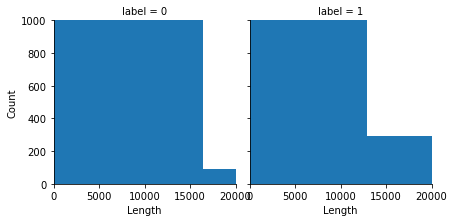

In [52]:
#checking the length of news for labels separately using FacetGrid
g=sns.FacetGrid(clean_data,col='label')
g.map_dataframe(plt.hist,x='len')
plt.axis([0,20000,0,1000])
g.set_axis_labels('Length','Count')
plt.show()

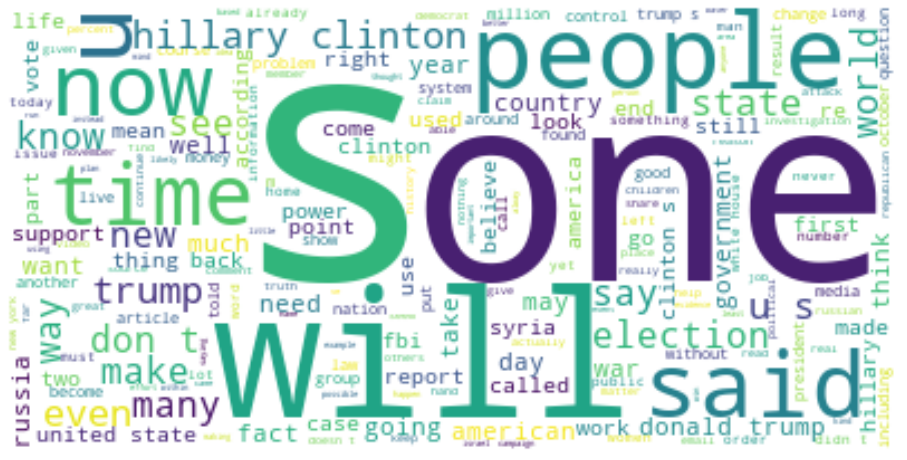

In [53]:
#wordcloud for fake news
import wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
fake=clean_data[clean_data['label']==1]
text=fake.news.values
wc=WordCloud(background_color='white',max_font_size=160).generate(" ".join(text))
plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Observation:

 > The frequently occuring words in fake news are : one, said, includ, people, even. The size of the word indicates the frequecy of the word in the text.

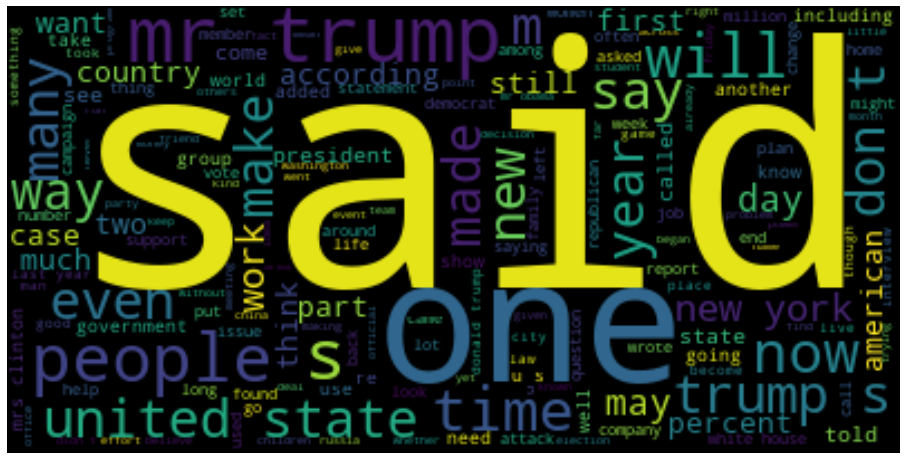

In [55]:
#wordcloud for non fake news
import wordcloud
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
genuine=clean_data[clean_data['label']==0]
text=genuine.news.values
wc=WordCloud(background_color='black',max_font_size=150).generate(" ".join(text))
plt.figure(figsize=(16,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

Observation:

> The frequently occuring words in non-fake news are : said, one, state, trump, people etc.

In [56]:
#converting words in th text data to vectors using CountVectorizer 
#With max_features we decide the maximum columns we wish to keep. max_features would take frequent 15000 words from the text.
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=15000,ngram_range=(1,3))
x=cv.fit_transform(clean_data['news']).toarray()

In [57]:
#Separating the target variable
y=clean_data['label']

In [58]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
print('x_train\tx_test\ty_train\ty_test')
print(x_train.shape,'\t',x_test.shape,'\t',y_train.shape,'\t',y_test.shape)

x_train	x_test	y_train	y_test
(12799, 15000) 	 (5486, 15000) 	 (12799,) 	 (5486,)


In [60]:
#importing Machine learning algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

#importing evaluation metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score

In [61]:
#Grid search cv to find optimal paramters for MultinomialNB
mn=MultinomialNB()
params={'alpha':np.arange(0,1,0.1)}
cv=GridSearchCV(mn,params,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'alpha': 0.0}


In [62]:
#GridSearchCv to find optimal parameters for logistic regression
lg=LogisticRegression()
param={'penalty':['l1','l2']}
cv=GridSearchCV(lg,param,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'penalty': 'l2'}


In [63]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
cv=GridSearchCV(rfc,parameters,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'gini'}


In [64]:
#Using GridSearchCV to optimize hyper parametres for DecisionTreeClassifier
parameters={'criterion':['entropy','gini']}
dtc=DecisionTreeClassifier()
cv=GridSearchCV(dtc,parameters,n_jobs=-1,scoring='accuracy')
cv.fit(x_train,y_train)
print(cv.best_params_)

{'criterion': 'entropy'}


In [65]:
#Now we have the optimal parameters we will make class of every algorithms.
lg=LogisticRegression(penalty='l2')
rf=RandomForestClassifier(criterion='gini')
mn=MultinomialNB(alpha=0.0)
dt=DecisionTreeClassifier(criterion='entropy')

In [66]:
#Making a list of all the algorithms.
Model=[]
Model.append(('RandomForestClassifier',rf))
Model.append(('LogisticRegression',lg))
Model.append(('MultinomialNB',mn))
Model.append(('DecisionTreeClassifier',dt))

Model: RandomForestClassifier

RandomForestClassifier()


Accuracy Score:  0.9414874225300766
F1 Score:  0.9308338720103426
Log loss: 2.0209847492897457
AUC_ROC_Score 0.9434895610507401


[[3005  102]
 [ 219 2160]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3107
           1       0.95      0.91      0.93      2379

    accuracy                           0.94      5486
   macro avg       0.94      0.94      0.94      5486
weighted avg       0.94      0.94      0.94      5486





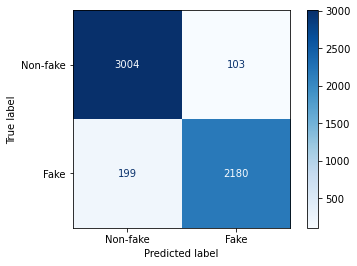

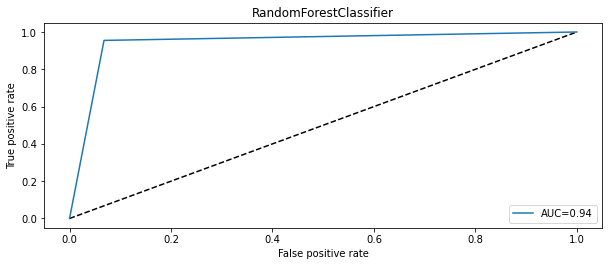



Model: LogisticRegression

LogisticRegression()


Accuracy Score:  0.9640904119577105
F1 Score:  0.9586221382062592
Log loss: 1.2402873698046186
AUC_ROC_Score 0.9633842359361882


[[3007  100]
 [  97 2282]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      3107
           1       0.96      0.96      0.96      2379

    accuracy                           0.96      5486
   macro avg       0.96      0.96      0.96      5486
weighted avg       0.96      0.96      0.96      5486





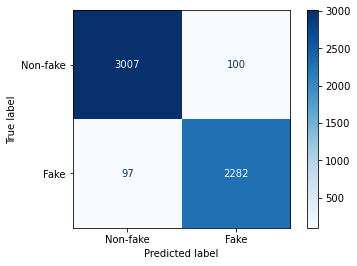

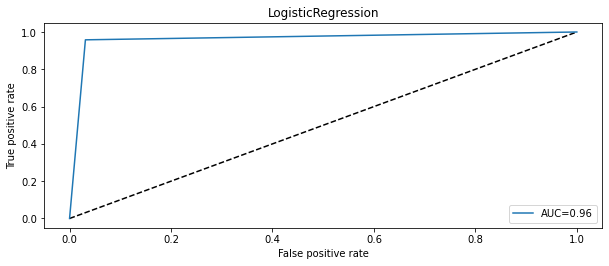



Model: MultinomialNB

MultinomialNB(alpha=0.0)


Accuracy Score:  0.9010207801676996
F1 Score:  0.8846398980242193
Log loss: 3.4186644299805455
AUC_ROC_Score 0.9001415159013598


[[2861  246]
 [ 297 2082]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      3107
           1       0.89      0.88      0.88      2379

    accuracy                           0.90      5486
   macro avg       0.90      0.90      0.90      5486
weighted avg       0.90      0.90      0.90      5486





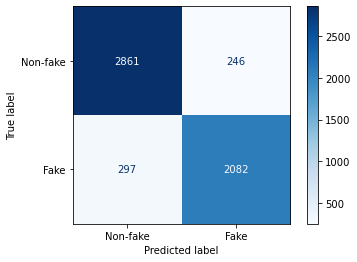

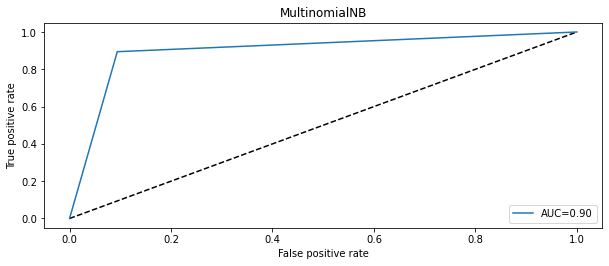



Model: DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy')


Accuracy Score:  0.9110462996718921
F1 Score:  0.897002954833263
Log loss: 3.0723889862310765
AUC_ROC_Score 0.9097887059784916


[[2873  234]
 [ 254 2125]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3107
           1       0.90      0.89      0.90      2379

    accuracy                           0.91      5486
   macro avg       0.91      0.91      0.91      5486
weighted avg       0.91      0.91      0.91      5486





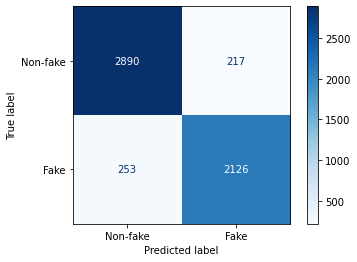

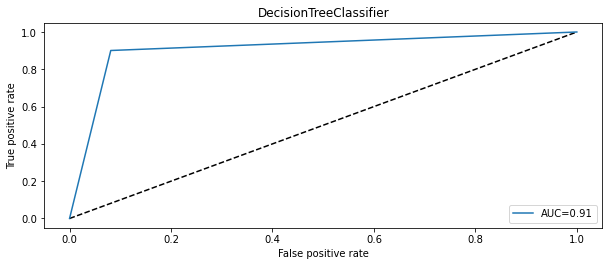

In [68]:
Models=[]
Accuracy=[]
Auc=[]
F1=[]
Log_loss=[]

for i,j in Model:
    print('Model: {}\n'.format(i))
    Models.append(i)
    
    j.fit(x_train,y_train)
    print(j)
    pred=j.predict(x_test)
    print('\n')
    
    acc=accuracy_score(pred,y_test)
    print('Accuracy Score: ',acc)
    Accuracy.append(acc*100)
    
    f1=f1_score(pred,y_test)
    print('F1 Score: ',f1)
    F1.append(f1*100)
    
    log=log_loss(pred,y_test)
    print('Log loss:',log)
    Log_loss.append(log)
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(pred,y_test)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Auc.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plot_confusion_matrix(j.fit(x_train,y_train),x_test,y_test,display_labels=['Non-fake','Fake'],cmap=plt.cm.Blues)
    plt.show()
    print("\n")
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(i)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')

In [69]:
#Dataframe to display all the results from different models.
pd.DataFrame({"Model":Models,"Accuracy Score":Accuracy,"F1 Score":F1,'ROC_AUC_Score':Auc,'Log loss':Log_loss})

Model  Accuracy Score   F1 Score  ROC_AUC_Score  Log loss
0  RandomForestClassifier       94.148742  93.083387      94.348956  2.020985
1      LogisticRegression       96.409041  95.862214      96.338424  1.240287
2           MultinomialNB       90.102078  88.463990      90.014152  3.418664
3  DecisionTreeClassifier       91.104630  89.700295      90.978871  3.072389

Observation:

Random  forest classifier has an accuracy score of 94, f1 score of 93 and a lower loss. Also, Random forest being a bagging classifier avoids overfitting.

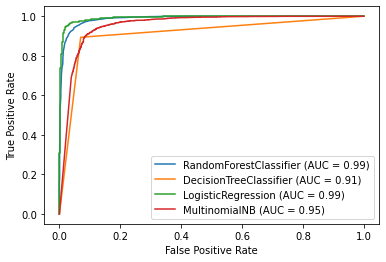

In [71]:
#Plotting roc curve of the models
from sklearn.metrics import plot_roc_curve

classifiers = [rf, dt, lg, mn]
xv = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=xv)

In [72]:
#Saving the best model
import joblib
joblib.dump(rf,'Fakenews.pkl')

['Fakenews.pkl']